In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target



#Print the class names
class_names = wine.target_names
print("Class Names:")
for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

# Access the target variable (data labels)
#target = wine.target
#target_names = wine.target_names

# Print the name of the target variable
#print("target_names")
#print(target_names)

# Get the feature names
feature_names = wine.feature_names

# Print the feature names
print("Feature Names:")
print(feature_names)


# Get the description of the dataset
description = wine.DESCR

# Print the description
print(description)
# Load the California housing dataset





Class Names:
Class 0: class_0
Class 1: class_1
Class 2: class_2
Feature Names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ========

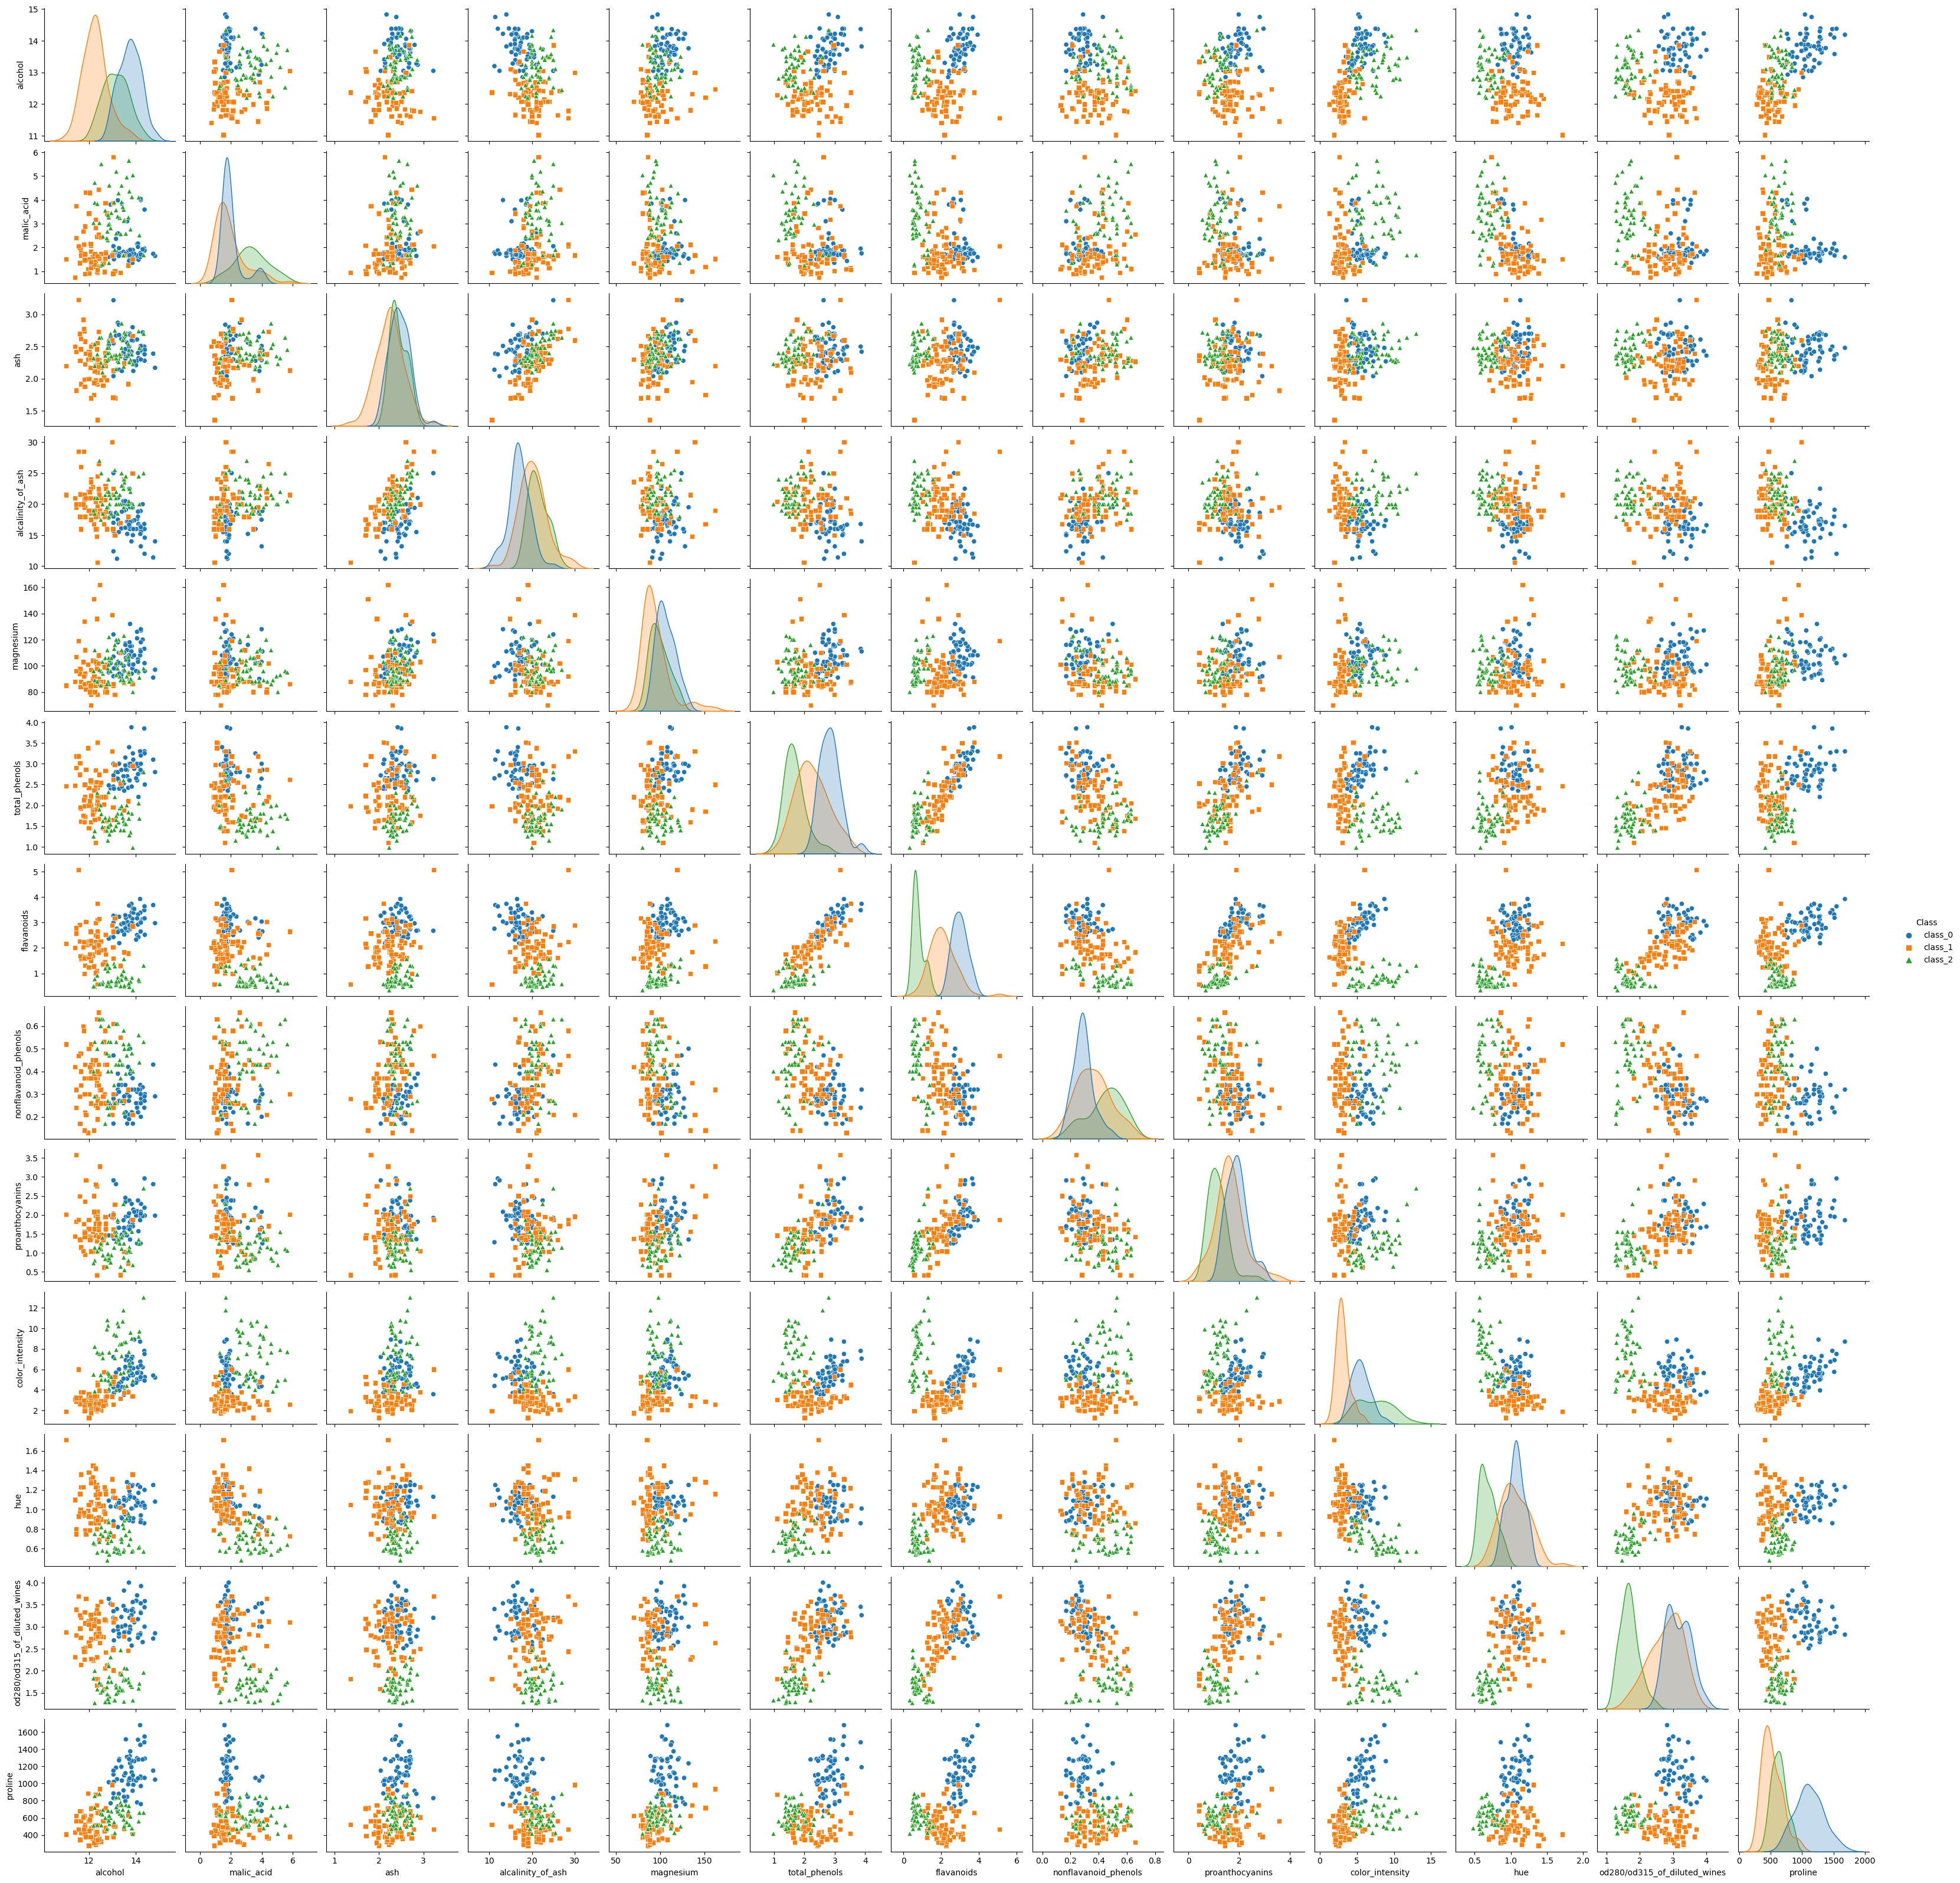

<Figure size 640x480 with 0 Axes>

In [24]:
# Convert the dataset to a pandas DataFrame for easy visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['Class'] = wine.target_names[y]

# Plot pair plots with class colors
sns.pairplot(df, hue='Class', markers=['o', 's', '^'])
plt.show()
plt.savefig('Explore Data.png')

In [21]:
# Choose a subset of features (e.g., first two features)
selected_features = X[:, :2]
print(selected_features)

[[14.23  1.71]
 [13.2   1.78]
 [13.16  2.36]
 [14.37  1.95]
 [13.24  2.59]
 [14.2   1.76]
 [14.39  1.87]
 [14.06  2.15]
 [14.83  1.64]
 [13.86  1.35]
 [14.1   2.16]
 [14.12  1.48]
 [13.75  1.73]
 [14.75  1.73]
 [14.38  1.87]
 [13.63  1.81]
 [14.3   1.92]
 [13.83  1.57]
 [14.19  1.59]
 [13.64  3.1 ]
 [14.06  1.63]
 [12.93  3.8 ]
 [13.71  1.86]
 [12.85  1.6 ]
 [13.5   1.81]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.87  1.9 ]
 [14.02  1.68]
 [13.73  1.5 ]
 [13.58  1.66]
 [13.68  1.83]
 [13.76  1.53]
 [13.51  1.8 ]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.56  1.71]
 [13.41  3.84]
 [13.88  1.89]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.9   1.68]
 [14.1   2.02]
 [13.94  1.73]
 [13.05  1.73]
 [13.83  1.65]
 [13.82  1.75]
 [13.77  1.9 ]
 [13.74  1.67]
 [13.56  1.73]
 [14.22  1.7 ]
 [13.29  1.97]
 [13.72  1.43]
 [12.37  0.94]
 [12.33  1.1 ]
 [12.64  1.36]
 [13.67  1.25]
 [12.37  1.13]
 [12.17  1.45]
 [12.37  1.21]
 [13.11  1

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
# Apply normalization methods
methods = [MinMaxScaler(), StandardScaler(), RobustScaler(), PowerTransformer()]

normalized_data = [method.fit_transform(selected_features) for method in methods]
print(normalized_data )

[array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0

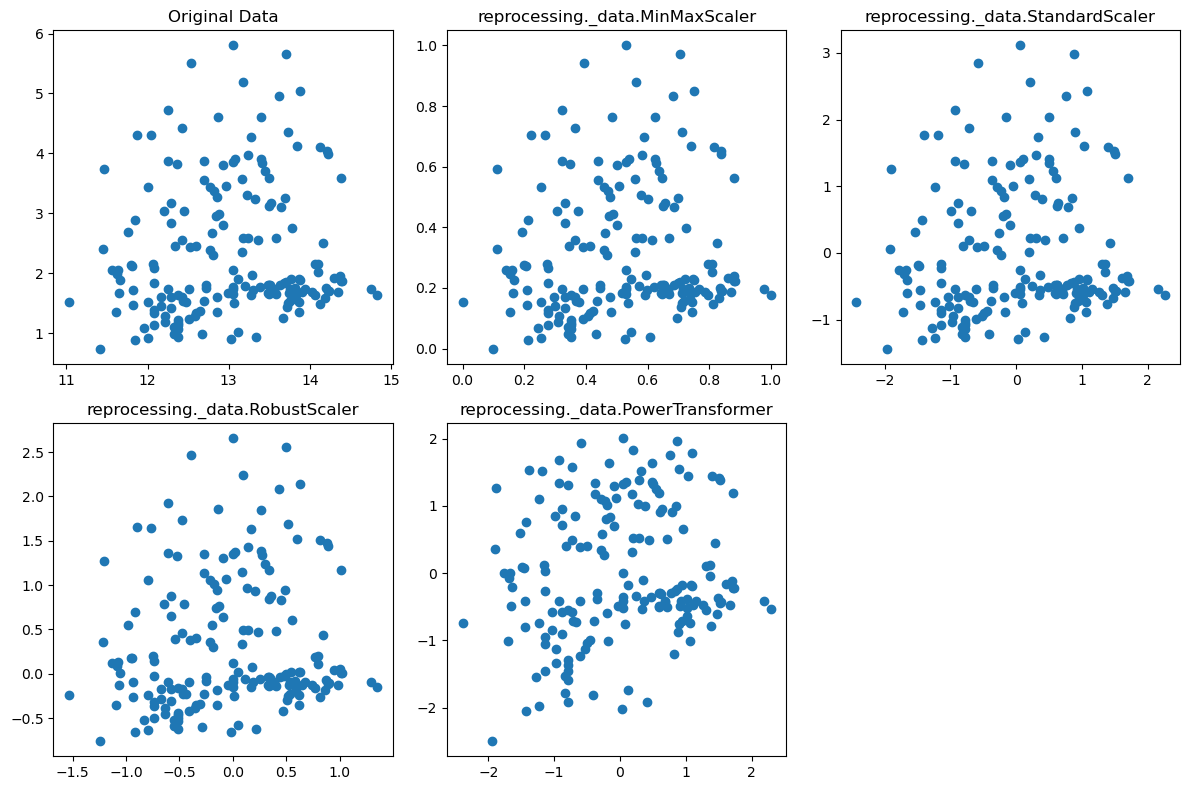

In [23]:
# Visualize data before and after normalization
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(selected_features[:, 0], selected_features[:, 1])
plt.title("Original Data")

for i, method in enumerate(methods):
    plt.subplot(2, 3, i + 2)
    plt.scatter(normalized_data[i][:, 0], normalized_data[i][:, 1])
    plt.title(str(type(method))[17:-2])

plt.tight_layout()
plt.show()


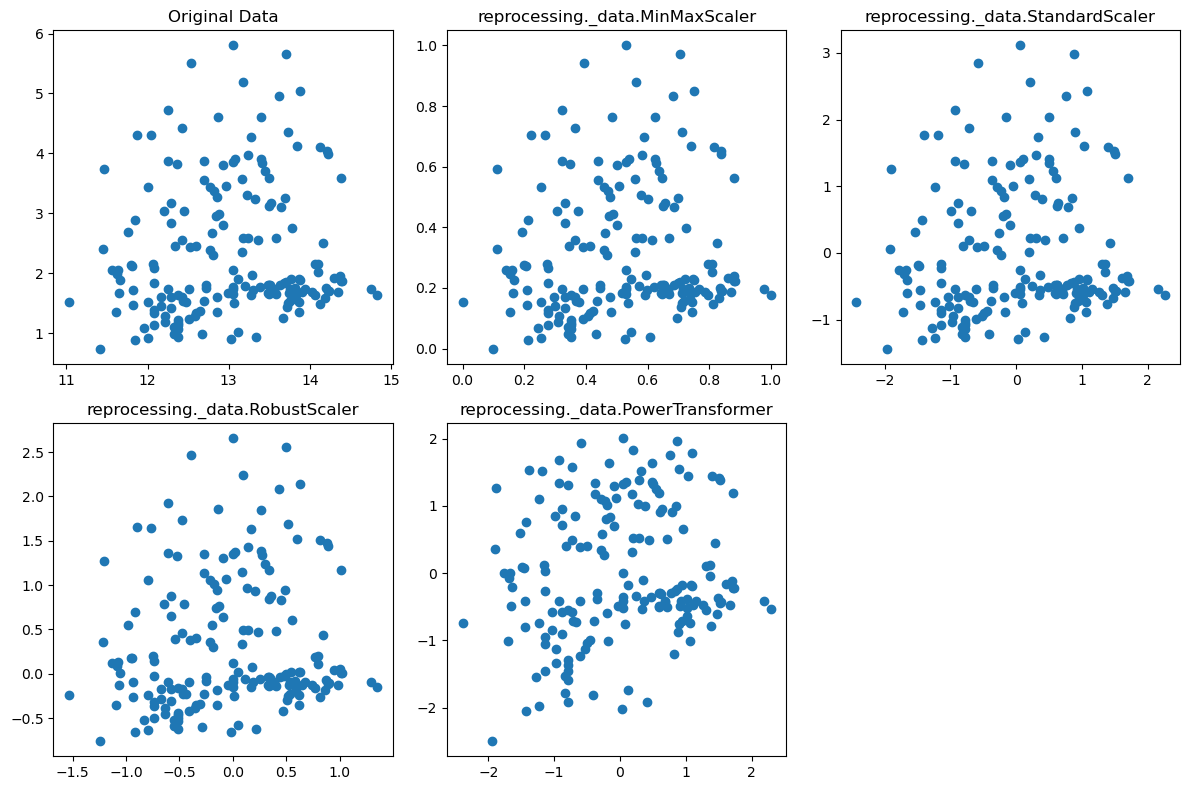

In [27]:
import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(selected_features[:, 0], selected_features[:, 1])
plt.title("Original Data")

for i, method in enumerate(methods):
    plt.subplot(2, 3, i + 2)
    plt.scatter(normalized_data[i][:, 0], normalized_data[i][:, 1])
    plt.title(str(type(method))[17:-2])

plt.tight_layout()
plt.show()

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape,  X_test.shape )
# print(y_train.shape,  y_test.shape )


# # Count the occurrences of each class label
# class_counts_train = np.bincount(y_train)


# # Generate class labels from 0 to 2
# class_labels = np.arange(3)

# # Plot the class distribution
# plt.figure(figsize=(8, 6))
# plt.bar(class_labels, class_counts_train, tick_label=class_labels, align='center')
# plt.xlabel('Class Label')
# plt.ylabel('Number of Samples')
# plt.title('Class Distribution in wine Dataset (Train)')
# plt.show()




# # Count the occurrences of each class label
# class_counts_test = np.bincount(y_test)

# # Generate class labels from 0 to 2
# class_labels = np.arange(3)

# # Plot the class distribution
# plt.figure(figsize=(8, 6))
# plt.bar(class_labels, class_counts_test, tick_label=class_labels, align='center')
# plt.xlabel('Class Label')
# plt.ylabel('Number of Samples')
# plt.title('Class Distribution in wine Dataset (Test)')
# plt.show()


pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])